# Project 7

## Sys Ops

In [1]:
cd ..

/home/alex/tmp/P7-ML-Rudy


/home/alex/tmp/P7-ML-Rudy/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
pwd

'/home/alex/tmp/P7-ML-Rudy'

## Imports 

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import missingno as msno

from sklearn.feature_selection import *
from sklearn.feature_extraction import *
from sklearn.decomposition import *
from sklearn.model_selection import *
from sklearn.impute import *
from sklearn.preprocessing import *
from sklearn.pipeline import *
from sklearn.covariance import *
from sklearn.metrics import *
from sklearn.compose import *

from sklearn.dummy import *
from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.ensemble import *
from sklearn.cluster import *

In [4]:
# DO NOT REMOVE THIS LINE

## Data

In [5]:
fn = "application_train.csv"
df = pd.read_csv("./data/source/" + fn)

In [6]:
df.shape

(307511, 122)

In [7]:
df = df.sample(frac=0.05)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
268076,410620,0,Cash loans,F,N,Y,0,157500.0,755190.0,29677.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
181509,310374,0,Cash loans,M,N,N,0,85500.0,270000.0,7555.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7161,108334,0,Cash loans,F,Y,Y,0,135000.0,339948.0,22437.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
131490,252501,0,Cash loans,F,N,N,0,337500.0,900000.0,50256.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
36461,142230,0,Cash loans,M,Y,Y,1,225000.0,159264.0,11668.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10625,112380,0,Cash loans,F,N,Y,0,90000.0,528633.0,25560.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
56274,165214,1,Revolving loans,F,N,N,0,247500.0,720000.0,36000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
180185,308811,0,Cash loans,M,N,Y,1,157500.0,808650.0,31464.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
198436,330072,0,Cash loans,F,N,Y,2,315000.0,1546020.0,45202.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0


In [8]:
# filter for correl
# df = df.filter(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
#                'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED'
#                ])

df = df.filter(
    [
        "TARGET",
        "NAME_CONTRACT_TYPE",
        "CODE_GENDER",
        "FLAG_OWN_CAR",
        "FLAG_OWN_REALTY",
        "CNT_CHILDREN",
        "AMT_INCOME_TOTAL",
        "AMT_CREDIT",
        "AMT_ANNUITY",
        "AMT_GOODS_PRICE",
        "NAME_TYPE_SUITE",
        "NAME_INCOME_TYPE",
        "NAME_EDUCATION_TYPE",
        "NAME_FAMILY_STATUS",
        "NAME_HOUSING_TYPE",
        "DAYS_BIRTH",
        "DAYS_EMPLOYED",
        "ORGANIZATION_TYPE",
        "OCCUPATION_TYPE",
        "EXT_SOURCE_1",
        "EXT_SOURCE_2",
        "EXT_SOURCE_3",
    ]
)


df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
268076,0,Cash loans,F,N,Y,0,157500.0,755190.0,29677.5,675000.0,...,Secondary / secondary special,Married,House / apartment,-21649,365243,XNA,NaN,0.749901,0.687685,0.662638
181509,0,Cash loans,M,N,N,0,85500.0,270000.0,7555.5,270000.0,...,Incomplete higher,Single / not married,With parents,-8097,-117,Trade: type 3,Sales staff,NaN,0.507272,NaN
7161,0,Cash loans,F,Y,Y,0,135000.0,339948.0,22437.0,315000.0,...,Higher education,Widow,House / apartment,-22605,365243,XNA,NaN,0.905153,0.666729,0.604113
131490,0,Cash loans,F,N,N,0,337500.0,900000.0,50256.0,900000.0,...,Higher education,Widow,House / apartment,-23152,-8953,School,Core staff,0.843245,0.413662,0.345785
36461,0,Cash loans,M,Y,Y,1,225000.0,159264.0,11668.5,126000.0,...,Secondary / secondary special,Married,House / apartment,-9892,-841,Business Entity Type 3,Cooking staff,0.292682,0.740132,0.377404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10625,0,Cash loans,F,N,Y,0,90000.0,528633.0,25560.0,472500.0,...,Secondary / secondary special,Married,House / apartment,-17748,-1840,Trade: type 7,Sales staff,NaN,0.429343,0.570917
56274,1,Revolving loans,F,N,N,0,247500.0,720000.0,36000.0,720000.0,...,Secondary / secondary special,Single / not married,House / apartment,-20008,-921,Self-employed,Cooking staff,0.781983,0.561374,0.513694
180185,0,Cash loans,M,N,Y,1,157500.0,808650.0,31464.0,675000.0,...,Secondary / secondary special,Married,House / apartment,-15328,-695,Business Entity Type 3,High skill tech staff,NaN,0.750672,0.621226
198436,0,Cash loans,F,N,Y,2,315000.0,1546020.0,45202.5,1350000.0,...,Secondary / secondary special,Married,House / apartment,-13506,-1838,Culture,NaN,NaN,0.604711,0.241861


## EDA Exploratory Data Analysis

In [9]:
df.sort_values("AMT_INCOME_TOTAL", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
294892,0,Revolving loans,F,N,Y,0,2250000.0,675000.0,33750.0,675000.0,...,Higher education,Married,House / apartment,-11691,-690,Business Entity Type 3,NaN,NaN,0.735551,0.362277
201855,0,Cash loans,F,Y,N,0,2250000.0,1542645.0,62829.0,1440000.0,...,Higher education,Single / not married,House / apartment,-15526,-1700,Legal Services,Core staff,0.705750,0.745500,0.692559
176312,0,Cash loans,F,Y,Y,0,2025000.0,1288350.0,41692.5,1125000.0,...,Higher education,Civil marriage,House / apartment,-9057,-549,Business Entity Type 3,IT staff,0.146757,0.399272,0.065110
227370,0,Cash loans,M,N,N,1,1575000.0,284400.0,13963.5,225000.0,...,Secondary / secondary special,Civil marriage,House / apartment,-13070,-5255,Industry: type 11,Laborers,NaN,0.657729,NaN
186708,0,Cash loans,F,N,Y,1,1440000.0,1125000.0,33025.5,1125000.0,...,Higher education,Separated,House / apartment,-17332,-2337,Self-employed,Managers,NaN,0.311962,0.401407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109834,0,Cash loans,F,N,N,0,29250.0,808650.0,23305.5,675000.0,...,Secondary / secondary special,Married,House / apartment,-22889,365243,XNA,NaN,0.764416,0.708808,0.746300
101690,0,Cash loans,F,N,Y,0,28404.0,225000.0,12564.0,225000.0,...,Secondary / secondary special,Married,House / apartment,-21755,365243,XNA,NaN,NaN,0.357282,0.698668
220602,0,Cash loans,F,N,Y,0,27000.0,45000.0,4450.5,45000.0,...,Secondary / secondary special,Married,House / apartment,-20079,365243,XNA,NaN,NaN,0.060382,NaN
162772,0,Cash loans,F,N,Y,0,27000.0,360000.0,20794.5,360000.0,...,Secondary / secondary special,Married,House / apartment,-22522,365243,XNA,NaN,NaN,0.344191,NaN


In [10]:
df.sort_values("AMT_CREDIT", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
287732,0,Cash loans,F,Y,N,1,405000.0,4050000.0,102514.5,4050000.0,...,Higher education,Married,House / apartment,-11355,-426,Business Entity Type 3,Accountants,0.443685,0.592158,NaN
184460,0,Cash loans,M,Y,N,1,391972.5,3375000.0,85320.0,3375000.0,...,Higher education,Married,House / apartment,-10139,-1458,Trade: type 2,Core staff,0.575781,0.453439,0.553165
7642,0,Cash loans,M,Y,N,1,382500.0,2925000.0,73944.0,2925000.0,...,Higher education,Civil marriage,House / apartment,-15752,-933,Trade: type 7,Managers,0.503985,0.591677,0.355639
253898,0,Cash loans,F,N,Y,0,540000.0,2695500.0,71235.0,2250000.0,...,Higher education,Married,House / apartment,-18046,-289,Services,Private service staff,0.764906,0.561535,NaN
255554,0,Cash loans,M,Y,N,2,225000.0,2695500.0,71235.0,2250000.0,...,Higher education,Married,Rented apartment,-15685,-5052,Business Entity Type 2,Managers,0.465574,0.671657,0.644679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209971,0,Cash loans,F,N,Y,0,90000.0,45000.0,4725.0,45000.0,...,Higher education,Separated,House / apartment,-14405,-7254,Other,Laborers,NaN,0.746871,0.652897
297906,0,Cash loans,F,N,Y,0,157500.0,45000.0,5467.5,45000.0,...,Secondary / secondary special,Separated,House / apartment,-13912,-269,Restaurant,Cooking staff,0.594916,0.506616,0.511892
106223,0,Cash loans,F,N,Y,0,90000.0,45000.0,4207.5,45000.0,...,Secondary / secondary special,Single / not married,With parents,-7786,-161,Trade: type 2,Core staff,0.221487,0.355672,0.304672
3320,0,Cash loans,F,N,Y,0,103500.0,45000.0,4738.5,45000.0,...,Secondary / secondary special,Married,House / apartment,-17007,-1569,Self-employed,Sales staff,NaN,0.700108,0.492060


In [11]:
df.sort_values("AMT_ANNUITY", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
109209,0,Revolving loans,M,Y,Y,0,1350000.0,2250000.0,225000.0,2250000.0,...,Higher education,Married,House / apartment,-19489,-7369,Trade: type 7,Managers,NaN,0.602854,NaN
165190,0,Revolving loans,M,Y,Y,4,765000.0,2250000.0,225000.0,2250000.0,...,Higher education,Married,House / apartment,-14747,-5516,Industry: type 2,Managers,NaN,0.253144,0.834784
221460,0,Cash loans,M,Y,Y,1,796500.0,2303460.0,215500.5,2250000.0,...,Higher education,Married,House / apartment,-13744,-2222,Business Entity Type 3,High skill tech staff,NaN,0.674367,0.654529
203541,0,Cash loans,M,Y,N,0,675000.0,2303460.0,213291.0,2250000.0,...,Higher education,Single / not married,House / apartment,-12098,-380,Business Entity Type 3,Managers,NaN,0.736511,0.602386
172304,0,Cash loans,M,Y,Y,0,704700.0,2254500.0,206464.5,2254500.0,...,Higher education,Married,House / apartment,-23442,-1371,Business Entity Type 3,Managers,NaN,0.698568,0.563835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263894,0,Cash loans,F,N,Y,0,135000.0,58500.0,3114.0,58500.0,...,Secondary / secondary special,Married,House / apartment,-15830,-929,Self-employed,Sales staff,0.482642,0.732190,0.780144
110163,0,Cash loans,F,N,Y,0,51750.0,50940.0,3051.0,45000.0,...,Incomplete higher,Single / not married,House / apartment,-24267,365243,XNA,NaN,NaN,0.427426,0.700184
177749,0,Cash loans,M,N,Y,0,67500.0,50940.0,2920.5,45000.0,...,Secondary / secondary special,Married,House / apartment,-23064,365243,XNA,NaN,NaN,0.699635,0.406617
255874,1,Cash loans,F,N,Y,0,67500.0,53910.0,2722.5,45000.0,...,Secondary / secondary special,Single / not married,House / apartment,-23790,365243,XNA,NaN,NaN,0.512240,0.641368


In [12]:
df.sort_values("AMT_GOODS_PRICE", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
287732,0,Cash loans,F,Y,N,1,405000.0,4050000.0,102514.5,4050000.0,...,Higher education,Married,House / apartment,-11355,-426,Business Entity Type 3,Accountants,0.443685,0.592158,NaN
184460,0,Cash loans,M,Y,N,1,391972.5,3375000.0,85320.0,3375000.0,...,Higher education,Married,House / apartment,-10139,-1458,Trade: type 2,Core staff,0.575781,0.453439,0.553165
7642,0,Cash loans,M,Y,N,1,382500.0,2925000.0,73944.0,2925000.0,...,Higher education,Civil marriage,House / apartment,-15752,-933,Trade: type 7,Managers,0.503985,0.591677,0.355639
75664,1,Cash loans,F,N,N,0,180000.0,2687355.0,67932.0,2475000.0,...,Higher education,Civil marriage,House / apartment,-10484,-2186,Self-employed,Sales staff,NaN,0.669203,NaN
1243,0,Cash loans,M,Y,N,1,247891.5,2254500.0,65988.0,2254500.0,...,Higher education,Married,House / apartment,-11361,-1252,Trade: type 7,Sales staff,0.236611,0.540325,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113036,0,Revolving loans,F,N,N,0,126000.0,202500.0,10125.0,NaN,...,Secondary / secondary special,Married,House / apartment,-12646,-4335,Transport: type 3,High skill tech staff,0.341123,0.532212,0.540654
273757,0,Revolving loans,F,N,Y,0,65250.0,202500.0,10125.0,NaN,...,Secondary / secondary special,Married,Municipal apartment,-21538,365243,XNA,NaN,0.831460,NaN,NaN
191858,0,Revolving loans,F,N,N,0,63000.0,180000.0,9000.0,NaN,...,Secondary / secondary special,Single / not married,Rented apartment,-7712,-458,Other,Cleaning staff,0.272387,0.145654,0.134265
263035,0,Revolving loans,M,N,Y,0,382500.0,1350000.0,67500.0,NaN,...,Higher education,Married,House / apartment,-17474,-2012,Business Entity Type 3,Managers,0.601449,0.726001,0.673830


In [13]:
df.sort_values("DAYS_BIRTH", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
73870,0,Cash loans,M,N,Y,0,94050.0,900297.0,24754.5,751500.0,...,Incomplete higher,Single / not married,House / apartment,-7680,-852,Trade: type 2,Core staff,0.370862,0.517374,0.553165
35956,0,Revolving loans,F,N,Y,0,90000.0,180000.0,9000.0,180000.0,...,Secondary / secondary special,Single / not married,With parents,-7683,-139,Medicine,Medicine staff,0.218992,0.488130,0.295583
90584,0,Revolving loans,F,N,N,0,63000.0,180000.0,9000.0,180000.0,...,Secondary / secondary special,Civil marriage,Rented apartment,-7688,-108,Business Entity Type 3,NaN,0.065703,0.085566,NaN
242657,0,Revolving loans,F,N,Y,0,90000.0,247500.0,12375.0,247500.0,...,Incomplete higher,Civil marriage,House / apartment,-7698,-987,Business Entity Type 3,Accountants,NaN,0.507240,0.436506
232273,0,Revolving loans,F,N,Y,0,157500.0,270000.0,13500.0,270000.0,...,Incomplete higher,Civil marriage,House / apartment,-7703,-639,Bank,Core staff,0.541679,0.529064,0.404878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130301,0,Cash loans,F,N,N,0,135000.0,251091.0,23364.0,238500.0,...,Secondary / secondary special,Single / not married,Co-op apartment,-25121,365243,XNA,NaN,NaN,0.571823,0.686382
201323,0,Cash loans,F,N,N,0,56250.0,193572.0,18985.5,171000.0,...,Higher education,Married,House / apartment,-25132,365243,XNA,NaN,NaN,0.659396,0.486653
161102,0,Cash loans,F,N,N,0,81000.0,239850.0,22540.5,225000.0,...,Secondary / secondary special,Married,House / apartment,-25132,365243,XNA,NaN,0.942333,0.760030,0.722393
271390,0,Cash loans,F,N,Y,0,103500.0,124722.0,12465.0,117000.0,...,Secondary / secondary special,Widow,House / apartment,-25143,365243,XNA,NaN,NaN,0.298519,0.780144


In [14]:
df.sort_values("DAYS_EMPLOYED", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
268076,0,Cash loans,F,N,Y,0,157500.0,755190.0,29677.5,675000.0,...,Secondary / secondary special,Married,House / apartment,-21649,365243,XNA,NaN,0.749901,0.687685,0.662638
114605,0,Cash loans,F,N,Y,0,135000.0,779688.0,34474.5,630000.0,...,Secondary / secondary special,Married,House / apartment,-21477,365243,XNA,NaN,NaN,0.394028,0.754406
270611,0,Cash loans,F,N,N,0,175500.0,1288350.0,41692.5,1125000.0,...,Secondary / secondary special,Married,House / apartment,-20162,365243,XNA,NaN,0.787506,0.556436,0.397946
258444,0,Cash loans,F,N,Y,0,85500.0,387144.0,28300.5,342000.0,...,Secondary / secondary special,Married,House / apartment,-22906,365243,XNA,NaN,NaN,0.169786,0.184116
249429,0,Cash loans,M,N,Y,0,157500.0,688500.0,31243.5,688500.0,...,Secondary / secondary special,Married,House / apartment,-23331,365243,XNA,NaN,NaN,0.417928,0.450747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129703,0,Cash loans,F,N,Y,0,103500.0,312768.0,20119.5,270000.0,...,Secondary / secondary special,Married,House / apartment,-23739,-15155,Business Entity Type 2,High skill tech staff,NaN,0.284841,0.698668
126156,0,Cash loans,F,N,Y,0,121500.0,225000.0,12564.0,225000.0,...,Secondary / secondary special,Married,House / apartment,-24084,-15578,Medicine,NaN,NaN,0.794666,0.490258
275901,0,Cash loans,F,N,N,0,112500.0,333337.5,26464.5,301500.0,...,Secondary / secondary special,Married,House / apartment,-23180,-15860,Other,NaN,NaN,0.426308,0.164414
74721,0,Cash loans,F,N,Y,0,72000.0,152820.0,8140.5,135000.0,...,Secondary / secondary special,Married,House / apartment,-23124,-16375,Business Entity Type 2,NaN,NaN,0.739631,0.736623


In [15]:
df.loc[df["DAYS_EMPLOYED"] == 365243, "DAYS_EMPLOYED"] = float("NaN")

In [16]:
df.sort_values("DAYS_EMPLOYED", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
88001,0,Cash loans,F,N,Y,0,90000.0,990432.0,38547.0,855000.0,...,Secondary / secondary special,Married,With parents,-8275,-4.0,Self-employed,Sales staff,NaN,0.638301,NaN
231582,1,Cash loans,F,Y,N,0,180000.0,450000.0,21888.0,450000.0,...,Higher education,Separated,With parents,-9926,-7.0,Bank,NaN,0.231677,0.678874,NaN
58458,0,Cash loans,F,N,Y,1,81000.0,72400.5,5935.5,58500.0,...,Secondary / secondary special,Separated,House / apartment,-11989,-12.0,Business Entity Type 2,Laborers,0.172492,0.559106,0.368969
107198,0,Cash loans,F,N,Y,0,195750.0,832500.0,27643.5,832500.0,...,Secondary / secondary special,Civil marriage,House / apartment,-13491,-15.0,Business Entity Type 1,Laborers,0.338925,0.405972,0.461482
258876,1,Cash loans,F,N,Y,0,67500.0,156384.0,16420.5,135000.0,...,Secondary / secondary special,Married,House / apartment,-19363,-16.0,School,Cleaning staff,NaN,0.312060,0.785052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129092,0,Cash loans,F,N,Y,0,315000.0,781920.0,24970.5,675000.0,...,Secondary / secondary special,Separated,House / apartment,-23190,NaN,XNA,NaN,NaN,0.605020,0.691021
46605,0,Cash loans,F,N,N,0,101250.0,755190.0,28116.0,675000.0,...,Secondary / secondary special,Married,House / apartment,-23902,NaN,XNA,NaN,NaN,0.289132,0.834784
208383,0,Cash loans,F,N,N,0,202500.0,558000.0,18000.0,558000.0,...,Secondary / secondary special,Married,House / apartment,-22998,NaN,XNA,NaN,NaN,0.388777,0.432962
104578,0,Cash loans,F,Y,N,0,247500.0,454500.0,13419.0,454500.0,...,Secondary / secondary special,Married,House / apartment,-20705,NaN,XNA,NaN,NaN,0.376263,0.572683


In [17]:
df.sort_values("DAYS_EMPLOYED", ascending=True)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
218832,0,Cash loans,F,N,N,0,180000.0,675000.0,29862.0,675000.0,...,Secondary / secondary special,Widow,Municipal apartment,-23627,-16767.0,Government,Core staff,0.742643,0.734661,0.581484
74721,0,Cash loans,F,N,Y,0,72000.0,152820.0,8140.5,135000.0,...,Secondary / secondary special,Married,House / apartment,-23124,-16375.0,Business Entity Type 2,NaN,NaN,0.739631,0.736623
275901,0,Cash loans,F,N,N,0,112500.0,333337.5,26464.5,301500.0,...,Secondary / secondary special,Married,House / apartment,-23180,-15860.0,Other,NaN,NaN,0.426308,0.164414
126156,0,Cash loans,F,N,Y,0,121500.0,225000.0,12564.0,225000.0,...,Secondary / secondary special,Married,House / apartment,-24084,-15578.0,Medicine,NaN,NaN,0.794666,0.490258
129703,0,Cash loans,F,N,Y,0,103500.0,312768.0,20119.5,270000.0,...,Secondary / secondary special,Married,House / apartment,-23739,-15155.0,Business Entity Type 2,High skill tech staff,NaN,0.284841,0.698668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129092,0,Cash loans,F,N,Y,0,315000.0,781920.0,24970.5,675000.0,...,Secondary / secondary special,Separated,House / apartment,-23190,NaN,XNA,NaN,NaN,0.605020,0.691021
46605,0,Cash loans,F,N,N,0,101250.0,755190.0,28116.0,675000.0,...,Secondary / secondary special,Married,House / apartment,-23902,NaN,XNA,NaN,NaN,0.289132,0.834784
208383,0,Cash loans,F,N,N,0,202500.0,558000.0,18000.0,558000.0,...,Secondary / secondary special,Married,House / apartment,-22998,NaN,XNA,NaN,NaN,0.388777,0.432962
104578,0,Cash loans,F,Y,N,0,247500.0,454500.0,13419.0,454500.0,...,Secondary / secondary special,Married,House / apartment,-20705,NaN,XNA,NaN,NaN,0.376263,0.572683


In [18]:
df.loc[df["ORGANIZATION_TYPE"] == "XNA", "ORGANIZATION_TYPE"] = float("NaN")

In [19]:
df.TARGET.value_counts(normalize=True)

TARGET
0    0.919875
1    0.080125
Name: proportion, dtype: float64

In [20]:
# Transformations

df.loc[df["CODE_GENDER"] == "M", "CODE_GENDER"] = 1
df.loc[df["CODE_GENDER"] == "F", "CODE_GENDER"] = 2
df.loc[df["CODE_GENDER"] == "XNA", "CODE_GENDER"] = 2
df.CODE_GENDER = df.CODE_GENDER.astype("int")


df.loc[df["FLAG_OWN_CAR"] == "Y", "FLAG_OWN_CAR"] = 1
df.loc[df["FLAG_OWN_CAR"] == "N", "FLAG_OWN_CAR"] = 0
df.FLAG_OWN_CAR = df.FLAG_OWN_CAR.astype("int")

df.loc[df["FLAG_OWN_REALTY"] == "Y", "FLAG_OWN_REALTY"] = 1
df.loc[df["FLAG_OWN_REALTY"] == "N", "FLAG_OWN_REALTY"] = 0
df.FLAG_OWN_REALTY = df.FLAG_OWN_REALTY.astype("int")

df.DAYS_BIRTH = -df.DAYS_BIRTH / 365
df.DAYS_EMPLOYED = -df.DAYS_EMPLOYED / 365

df.dtypes

TARGET                   int64
NAME_CONTRACT_TYPE      object
CODE_GENDER              int64
FLAG_OWN_CAR             int64
FLAG_OWN_REALTY          int64
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH             float64
DAYS_EMPLOYED          float64
ORGANIZATION_TYPE       object
OCCUPATION_TYPE         object
EXT_SOURCE_1           float64
EXT_SOURCE_2           float64
EXT_SOURCE_3           float64
dtype: object

In [21]:
df.isna().mean()

TARGET                 0.000000
NAME_CONTRACT_TYPE     0.000000
CODE_GENDER            0.000000
FLAG_OWN_CAR           0.000000
FLAG_OWN_REALTY        0.000000
CNT_CHILDREN           0.000000
AMT_INCOME_TOTAL       0.000000
AMT_CREDIT             0.000000
AMT_ANNUITY            0.000065
AMT_GOODS_PRICE        0.000911
NAME_TYPE_SUITE        0.004618
NAME_INCOME_TYPE       0.000000
NAME_EDUCATION_TYPE    0.000000
NAME_FAMILY_STATUS     0.000000
NAME_HOUSING_TYPE      0.000000
DAYS_BIRTH             0.000000
DAYS_EMPLOYED          0.181126
ORGANIZATION_TYPE      0.181126
OCCUPATION_TYPE        0.314191
EXT_SOURCE_1           0.562630
EXT_SOURCE_2           0.002276
EXT_SOURCE_3           0.198426
dtype: float64

In [22]:
df.select_dtypes(include="object").nunique()

NAME_CONTRACT_TYPE      2
NAME_TYPE_SUITE         7
NAME_INCOME_TYPE        4
NAME_EDUCATION_TYPE     5
NAME_FAMILY_STATUS      5
NAME_HOUSING_TYPE       6
ORGANIZATION_TYPE      57
OCCUPATION_TYPE        18
dtype: int64

In [23]:
df["nan_EXT_SOURCE_1"] = df.EXT_SOURCE_1.isna().astype("int")
df.drop(
    columns=["ORGANIZATION_TYPE", "OCCUPATION_TYPE", "EXT_SOURCE_1"],
    inplace=True,
    errors="ignore",
)


df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,nan_EXT_SOURCE_1
268076,0,Cash loans,2,0,1,0,157500.0,755190.0,29677.5,675000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,59.312329,NaN,0.687685,0.662638,0
181509,0,Cash loans,1,0,0,0,85500.0,270000.0,7555.5,270000.0,Unaccompanied,Commercial associate,Incomplete higher,Single / not married,With parents,22.183562,0.320548,0.507272,NaN,1
7161,0,Cash loans,2,1,1,0,135000.0,339948.0,22437.0,315000.0,Unaccompanied,Pensioner,Higher education,Widow,House / apartment,61.931507,NaN,0.666729,0.604113,0
131490,0,Cash loans,2,0,0,0,337500.0,900000.0,50256.0,900000.0,Unaccompanied,Working,Higher education,Widow,House / apartment,63.430137,24.528767,0.413662,0.345785,0
36461,0,Cash loans,1,1,1,1,225000.0,159264.0,11668.5,126000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,27.101370,2.304110,0.740132,0.377404,0


In [24]:
# df.corr()

<Axes: >

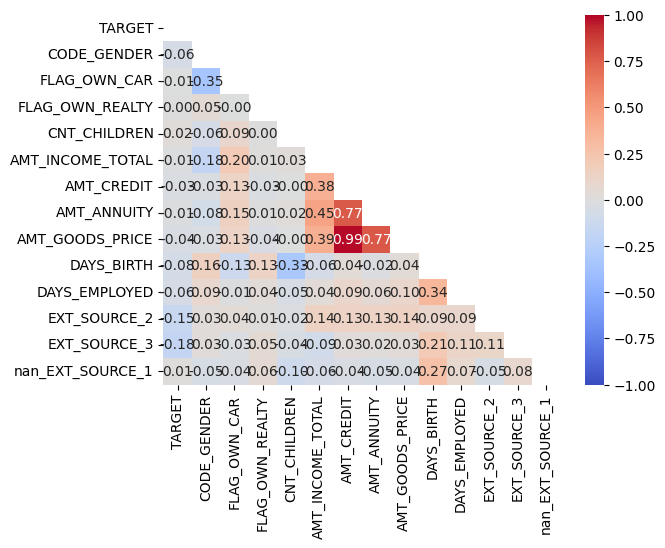

In [25]:
corr = df.select_dtypes(include=np.number).corr()
mask = np.triu(corr)
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm", fmt=".2f", mask=mask)

In [26]:
# on construit la matrice X des Features
X = df.drop(columns="TARGET")
X

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,nan_EXT_SOURCE_1
268076,Cash loans,2,0,1,0,157500.0,755190.0,29677.5,675000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,59.312329,NaN,0.687685,0.662638,0
181509,Cash loans,1,0,0,0,85500.0,270000.0,7555.5,270000.0,Unaccompanied,Commercial associate,Incomplete higher,Single / not married,With parents,22.183562,0.320548,0.507272,NaN,1
7161,Cash loans,2,1,1,0,135000.0,339948.0,22437.0,315000.0,Unaccompanied,Pensioner,Higher education,Widow,House / apartment,61.931507,NaN,0.666729,0.604113,0
131490,Cash loans,2,0,0,0,337500.0,900000.0,50256.0,900000.0,Unaccompanied,Working,Higher education,Widow,House / apartment,63.430137,24.528767,0.413662,0.345785,0
36461,Cash loans,1,1,1,1,225000.0,159264.0,11668.5,126000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,27.101370,2.304110,0.740132,0.377404,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10625,Cash loans,2,0,1,0,90000.0,528633.0,25560.0,472500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,48.624658,5.041096,0.429343,0.570917,1
56274,Revolving loans,2,0,0,0,247500.0,720000.0,36000.0,720000.0,Family,Working,Secondary / secondary special,Single / not married,House / apartment,54.816438,2.523288,0.561374,0.513694,0
180185,Cash loans,1,0,1,1,157500.0,808650.0,31464.0,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,41.994521,1.904110,0.750672,0.621226,1
198436,Cash loans,2,0,1,2,315000.0,1546020.0,45202.5,1350000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,37.002740,5.035616,0.604711,0.241861,1


In [27]:
# On construit l vecteur y des Targets
y = df["TARGET"]
y

268076    0
181509    0
7161      0
131490    0
36461     0
         ..
10625     0
56274     1
180185    0
198436    0
182611    0
Name: TARGET, Length: 15376, dtype: int64

In [28]:
y.values

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
def resultize(grid, verbose=2):
    """make results based on gridsearchcv"""

    # make df
    results = pd.DataFrame(grid.cv_results_)

    # clean columns
    cols = [i for i in results.columns if not i.startswith("split")]
    results = results.loc[:, cols]

    if verbose == 2:
        print("coucou")

    return results.round(2)

In [30]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Modelisation

### Refactoring avec utilisation de Pipeline 

### Création du ColumnTransformer

In [31]:
numerical_features = [
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "CNT_CHILDREN",
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE",
    "DAYS_BIRTH",
    "DAYS_EMPLOYED",
    # "EXT_SOURCE_1",
    "EXT_SOURCE_2",
    "EXT_SOURCE_3",
]

categorical_features = [
    "NAME_CONTRACT_TYPE",
    "NAME_TYPE_SUITE",
    "NAME_INCOME_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    # "OCCUPATION_TYPE",
    # "ORGANIZATION_TYPE",
]

In [32]:
# Création de 2 Pipelines

numerical_pipeline = make_pipeline(KNNImputer(), StandardScaler())

categorical_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"), OneHotEncoder()
)

In [38]:
# Création du ColumnTransformer
# numerical_pipeline est appliquée sur les numerical_features
# categorical_pipeline est appliquée sur les categorical_features

ColumnTransformer = make_column_transformer(
    (numerical_pipeline, numerical_features),
    (categorical_pipeline, categorical_features),
)
ColumnTransformer

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('knnimputer', KNNImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['CODE_GENDER', 'FLAG_OWN_CAR',
                                  'FLAG_OWN_REALTY', 'CNT_CHILDREN',
                                  'AMT_INCOME_TOTAL', 'AMT_CREDIT',
                                  'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                                  'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_2',
                                  'EXT_SOURCE_3']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE',
                                  'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                                  'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'])])

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

pipe = Pipeline(
    [
        ("columntransformer", ColumnTransformer),
        #  ("inputer", KNNImputer()),
        #  ("scaler", StandardScaler()),
        ("estimator", DummyClassifier()),
    ]
)

In [45]:
param_grid = {
    "estimator": [
        RandomForestClassifier(),
        LogisticRegression(),
    ],
}

In [46]:
grid2 = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=3,
    verbose=2,
    return_train_score=True,
    n_jobs=-1,
)
grid2

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('knnimputer',
                                                                                          KNNImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['CODE_GENDER',
                                                                          'FLAG_OWN_CAR',
                                                                          'FLAG_OWN_REALTY',
                                                                          'CNT_CHILDREN',
                                                                          'AMT_INCOME_TOTAL',
                                                                          'AMT_CREDIT',
                                                                          'AMT_ANNUITY',
                                                                          'AMT_GOODS_PRICE',
                                                                          'DAYS_BIRTH',
                                                                          'DAYS_EMPLOYED',
                                                                          '...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         ['NAME_CONTRACT_TYPE',
                                                                          'NAME_TYPE_SUITE',
                                                                          'NAME_INCOME_TYPE',
                                                                          'NAME_EDUCATION_TYPE',
                                                                          'NAME_FAMILY_STATUS',
                                                                          'NAME_HOUSING_TYPE'])])),
                                       ('estimator', DummyClassifier())]),
             n_jobs=-1,
             param_grid={'estimator': [RandomForestClassifier(),
                                       LogisticRegression()]},
             return_train_score=True, verbose=2)

In [47]:
grid2.fit(X, y)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [ ]:
resultize(grid2)

coucou


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
0,8.58,0.06,4.53,0.04,{},0.92,0.0,1,0.92,0.0
